In [29]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.signal import savgol_filter, find_peaks
import regex as re
#Read files
rate0, data0 = wavfile.read('./data/50_0test.wav')
rate1, data1 = wavfile.read('./data/50_1test.wav')

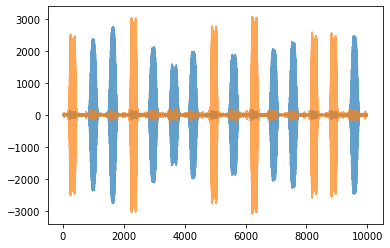

In [30]:
#Look at the first 5 seconds, expecting 15 attacks
plt.plot(data0[0:2000*5],alpha=0.7)
plt.plot(data1[0:2000*5],alpha=0.7);

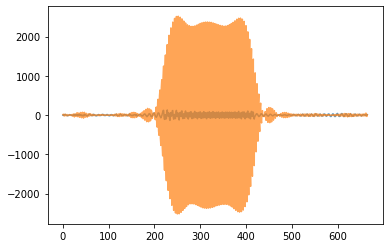

In [31]:
#Individual pulses, expected width of 0.1 seconds or 2000 Hz*0.1s=200 data points
plt.plot(data0[0:2000//3],alpha=0.7)
plt.plot(data1[0:2000//3],alpha=0.7);

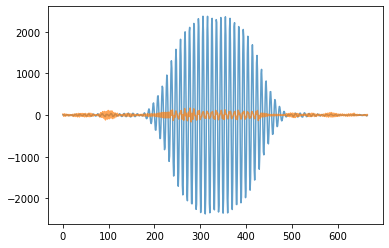

In [32]:
plt.plot(data0[2000//3:2000//3*2],alpha=0.7)
plt.plot(data1[2000//3:2000//3*2],alpha=0.7);

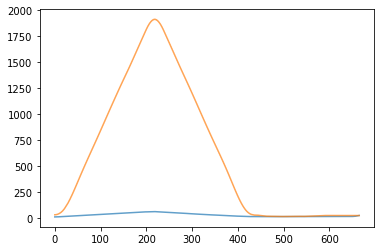

In [33]:
#Looks pretty good, find peaks by filtering the absolute value or square
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
norm0=moving_average(np.abs(data0),201)
norm1=moving_average(np.abs(data1),201)

plt.plot(norm0[0:2000//3],alpha=0.7)
plt.plot(norm1[0:2000//3],alpha=0.7);


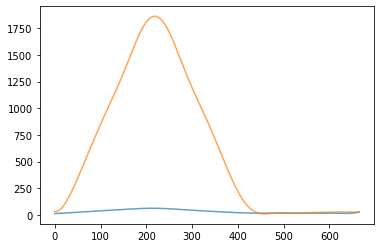

In [34]:
#Smooth double peaks

smooth0=savgol_filter(norm0, window_length = 201, polyorder = 5)
smooth1=savgol_filter(norm1, window_length = 201, polyorder = 5)

plt.plot(smooth0[0:2000//3],alpha=0.7)
plt.plot(smooth1[0:2000//3],alpha=0.7);

In [35]:
#And find crit sequence

peaks0,_= find_peaks(smooth0,height=500)
peaks1,_= find_peaks(smooth1,height=500)

peaks0={(x,0) for x in peaks0}
peaks1={(x,1) for x in peaks1}

allPeaks=list(peaks0|peaks1)
allPeaks.sort(key=lambda x:x[0])

crits=''.join([str(x) for _,x in allPeaks])